In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as ms
from collections import ChainMap

In [129]:
df = pd.read_csv('July_df.csv')

In [3]:
df = df.drop(['Unnamed: 0'], axis =1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292678 entries, 0 to 292677
Data columns (total 10 columns):
 #   Column                                         Non-Null Count   Dtype
---  ------                                         --------------   -----
 0   Violation Location                             292678 non-null  int64
 1   Violation Code                                 292678 non-null  int64
 2   Vehicle Body Type                              292678 non-null  int64
 3   Vehicle Make                                   292678 non-null  int64
 4   Violation Time                                 292678 non-null  int64
 5   Violation County                               292678 non-null  int64
 6   Street Name                                    292678 non-null  int64
 7   Vehicle Color                                  292678 non-null  int64
 8   Median income (dollars); Estimate; Households  292678 non-null  int64
 9   IssueDate                                      292678 non-n

In [133]:
df['Violation Time'].tail(40)

292638     639
292639     643
292640     592
292641     662
292642     664
292643     666
292644     668
292645     149
292646     894
292647    1384
292648    1386
292649    1380
292650    1380
292651    1024
292652    1032
292653    1036
292654    1042
292655    1048
292656    1054
292657    1062
292658    1145
292659    1330
292660    1419
292661    1415
292662    1419
292663     173
292664     628
292665     748
292666     748
292667     894
292668    1351
292669    1355
292670    1359
292671    1361
292672     179
292673     179
292674     181
292675     969
292676    1179
292677    1159
Name: Violation Time, dtype: int64

Map overlapping Violation Code

In [4]:
df3 = df.copy()

one = [9]
two = [10,11,13,14,16,17,18,19,22,45,27,47,48,49,50,51,52,63,80,82,89,96,98,99,31,54]
three = [8,29]
four = [20,21,23,24,77,78,84,85,97,4,6,68,66,67]
five = [25,26]
six = [33]
seven = [35,42,69]
eight = [37,39,44,38,64,65]
nine = [0,34,41,90,95]
ten = [40]
eleven = [53,46,59,60,61,62,79]
twelve = [70,71,72,73,74,75,76,83,94]
thirteen = [87]
fourteen = [91,92,93]

d = ChainMap(dict.fromkeys(one, 1), dict.fromkeys(two, 2), dict.fromkeys(three, 3), dict.fromkeys(four, 4),
             dict.fromkeys(five, 5), dict.fromkeys(six, 6), dict.fromkeys(seven, 7), dict.fromkeys(eight, 8),
             dict.fromkeys(nine, 9), dict.fromkeys(ten, 10), dict.fromkeys(eleven, 11),
             dict.fromkeys(twelve, 12), dict.fromkeys(thirteen, 13), dict.fromkeys(fourteen, 14))

df3['VCode'] = df3['Violation Code'].map(d.get).astype(int)


In [5]:
df3

,Violation Location,Violation Code,Vehicle Body Type,Vehicle Make,Violation Time,Violation County,Street Name,Vehicle Color,Median income (dollars); Estimate; Households,IssueDate,VCode
0,1,46,87,52,130,4,3529,80,85032,0,11
1,1,63,81,16,1318,4,3529,-1,85032,4,2
2,1,63,28,147,1308,4,3529,165,85032,4,2
3,1,63,87,95,1306,4,3529,165,85032,4,2
4,1,63,28,167,1358,4,3529,74,85032,4,2
...,...,...,...,...,...,...,...,...,...,...,...
292673,75,14,87,24,179,2,1755,158,26002,4,2
292674,75,14,87,95,181,2,1755,10,26002,4,2
292675,75,53,87,38,969,4,1941,78,26002,1,11
292676,75,53,81,215,1179,2,1941,30,26002,3,11


In [6]:
df3['VCode'].unique()

array([11,  2, 10,  8, 12,  4,  7, 13,  9,  5,  1,  6, 14,  3])

In [40]:
df3['Violation County'].unique()

array([ 4,  2,  3, -1,  7,  0,  5,  1,  6])

In [7]:
df3['Violation Time'] = df3['Violation Time'].div(100).astype(int)

In [8]:
df3['Violation Time'].unique()

array([ 1, 13, 12,  6,  4, 10,  5,  7,  3,  8,  9,  2,  0, 14, 11, 15])

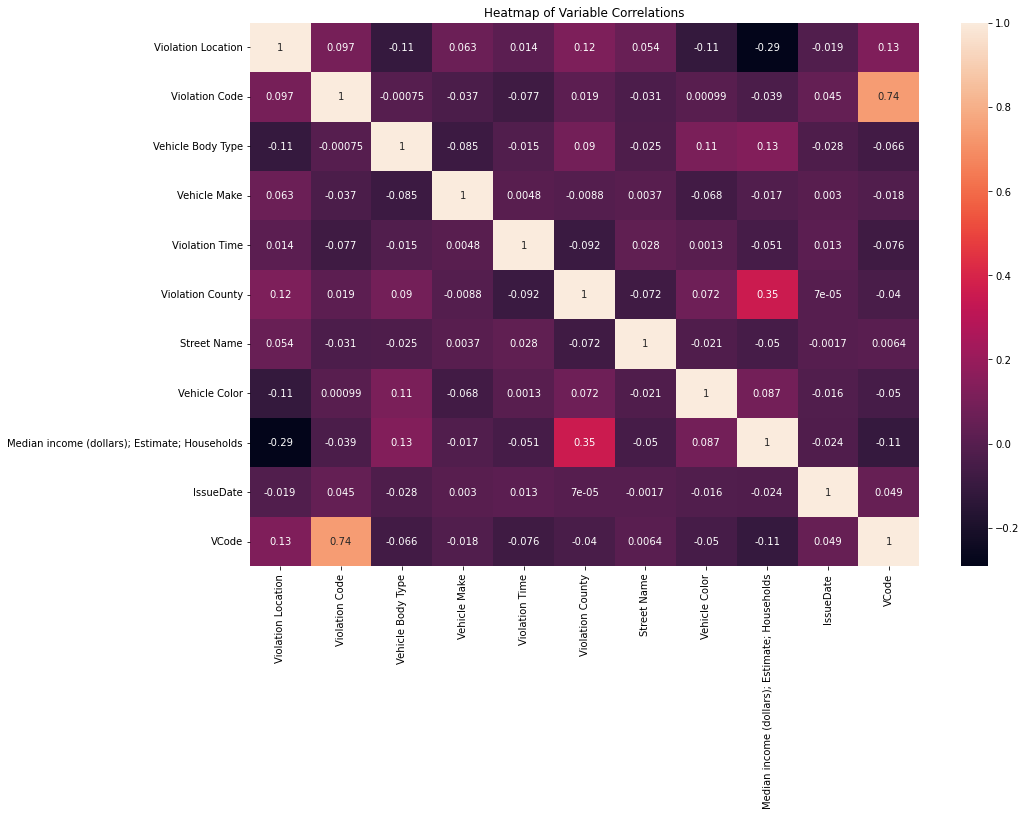

In [7]:
plt.figure(figsize=(15,10))
sns.heatmap(df3.corr(),annot=True)
plt.title('Heatmap of Variable Correlations')
plt.show()

In [9]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import ExtraTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.semi_supervised import LabelSpreading
from sklearn.svm import LinearSVC
#from sklearn.neighbors.nearest_centroid import NearestCentroid
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, plot_roc_curve
from sklearn.metrics import f1_score
from sklearn import metrics

In [10]:
df3['Violation Location'].unique()

array([  1,   5,  79,  88,   9,  90,  84,  34,   6,   7,  14,  94, 121,
       120,  68,  76,  83,  81,  77,  78,  17,  67,  10, 122,  42,  48,
        46,  40,  44,  52,  43,  50,  47,  45,  49,  41,  73,  75,  72,
        70,  71,  13,  20,  66,  26,  19,  24,  23, 101, 123,  22,  18,
        62, 105,  60,  61,  63,  25,  28,  32,  33, 103, 113, 107, 203,
       108,  86,  69, 115, 110, 109, 106, 102, 104,  30,   4, 114, 100,
       111,  11,  29,   8, 168,  65, 116, 117,  96,  87,  56, 112, 119,
        99, 136,  16, 805,  39,  15])

In [43]:
df8 = df3.copy()

df8 = df8[['Violation Location', 'Violation Time', 'IssueDate', 'Violation County', 'VCode']]
df8

,Violation Location,Violation Time,IssueDate,Violation County,VCode
0,1,1,0,4,11
1,1,13,4,4,2
2,1,13,4,4,2
3,1,13,4,4,2
4,1,13,4,4,2
...,...,...,...,...,...
292673,75,1,4,2,2
292674,75,1,4,2,2
292675,75,9,1,4,11
292676,75,11,3,2,11


In [44]:
df8.to_csv('deploy.csv')

In [11]:
df3.drop(df3[df3['Violation Location'] == 805].index, inplace=True)

In [94]:

counts = df3['Violation Location'].value_counts()
#counts2 = df3['VCode'].value_counts()
print(counts)

#df3 = df3[~df3['Violation Location'].isin(counts[counts < 2].index)]

1      16915
5      15444
6      12556
84      9343
7       9103
       ...  
203        1
65         1
168        1
8          1
15         1
Name: Violation Location, Length: 96, dtype: int64


In [101]:
df7 = df3.copy()

#df7 = df7[df7.groupby('Violation Location')..transform('count')>100] 
df7 = df7[~df7['Violation Location'].isin(counts[counts < 100].index)]
counts = df7['Violation Location'].value_counts()
print(counts)
#df7 = df7[~df7['Violation Location'].isin(counts[counts < 2].index)]


1      16915
5      15444
6      12556
84      9343
7       9103
       ...  
69       644
101      456
72       241
10       233
100      212
Name: Violation Location, Length: 76, dtype: int64


In [102]:
df7['Violation Location'].unique()

array([  1,   5,  79,  88,   9,  90,  84,  34,   6,   7,  14,  94, 121,
       120,  68,  76,  83,  81,  77,  78,  17,  67,  10, 122,  42,  48,
        46,  40,  44,  52,  43,  50,  47,  45,  49,  41,  73,  75,  72,
        70,  71,  13,  20,  66,  26,  19,  24,  23, 101, 123,  18,  62,
       105,  60,  61,  63,  25,  28,  32,  33, 103, 113, 107, 108,  69,
       115, 110, 109, 106, 102, 104,  30, 114, 100, 111, 112])

In [69]:
df4 = df3.copy()
df4['Violation Location'] = df4['Violation Location'].div(10).astype(int)
df4

,Violation Location,Violation Code,Vehicle Body Type,Vehicle Make,Violation Time,Violation County,Street Name,Vehicle Color,Median income (dollars); Estimate; Households,IssueDate,VCode
0,0,46,87,52,130,4,3529,80,85032,0,11
1,0,63,81,16,1318,4,3529,-1,85032,4,2
2,0,63,28,147,1308,4,3529,165,85032,4,2
3,0,63,87,95,1306,4,3529,165,85032,4,2
4,0,63,28,167,1358,4,3529,74,85032,4,2
...,...,...,...,...,...,...,...,...,...,...,...
292673,7,14,87,24,179,2,1755,158,26002,4,2
292674,7,14,87,95,181,2,1755,10,26002,4,2
292675,7,53,87,38,969,4,1941,78,26002,1,11
292676,7,53,81,215,1179,2,1941,30,26002,3,11


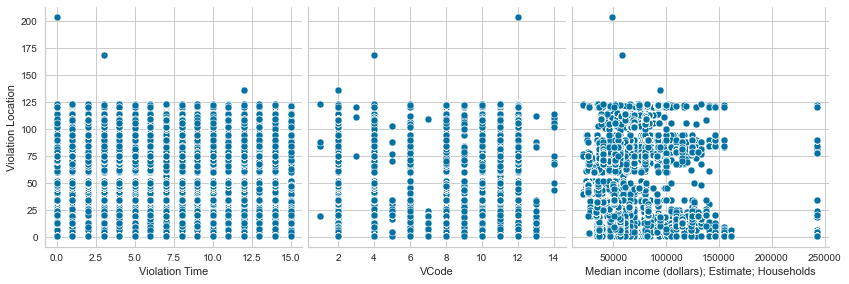

In [320]:
sns.pairplot(df3, x_vars=['Violation Time', 'VCode', 'Median income (dollars); Estimate; Households'], y_vars='Violation Location', height=4, aspect=1, kind='scatter')
plt.show()

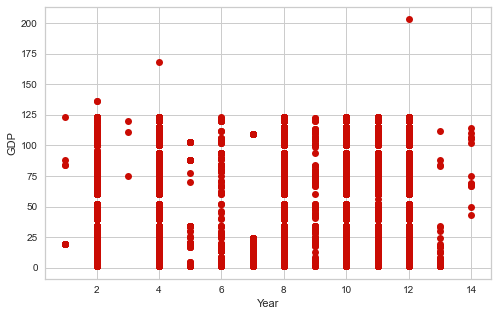

In [321]:
plt.figure(figsize=(8,5))
x_data, y_data = (df3["VCode"].values, df3["Violation Location"].values)
plt.plot(x_data, y_data, 'ro')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

In [128]:
#x = df3[['Violation Time','VCode','IssueDate', 'Median income (dollars); Estimate; Households',
         # 'Violation County']]

x = df7[['Violation Location','Violation Time','IssueDate', 'Street Name', 'Median income (dollars); Estimate; Households', 'Vehicle Body Type' ]]
#x = df3[['Street Name', 'Violation Location']]
#y = df3['Median income (dollars); Estimate; Households']
#y = df3['Violation Location']
y = df7['VCode']

In [123]:
X_train, X_test, Y_train, Y_test = train_test_split(
    x,
    y, 
    test_size = 0.2,
    random_state=30
)

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(234118, 6) (234118,)
(58530, 6) (58530,)


In [111]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [124]:
dec_tree = DecisionTreeClassifier()
dec_tree = dec_tree.fit(X_train, Y_train)
dec_tree.score(X_train, Y_train)

0.698331610555361

In [125]:
dec_tree_pred = dec_tree.predict(X_test)

In [73]:
a = np.array([5, 2, 2, 56025, 4]).reshape(1,-1)
a

array([[    5,     2,     2, 56025,     4]])

In [74]:
dec_tree.predict(a)

/Users/gudmundurjonasson/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


ValueError: X has 5 features, but DecisionTreeClassifier is expecting 4 features as input.

In [126]:
test_acc = dec_tree.score(X_test, Y_test)
test_acc

0.35856825559542116

In [127]:
dframe = pd.DataFrame({'Actual':Y_test,'Predict':dec_tree_pred})
print('Accuracy score', metrics.accuracy_score(Y_test, dec_tree_pred))
dframe

Accuracy score 0.35856825559542116


,Actual,Predict
140981,13,13
167652,9,6
127102,5,2
244823,13,13
285908,3,3
...,...,...
222545,13,9
67340,9,9
28934,10,13
272946,0,11


In [90]:
Feature_Importance = pd.DataFrame({'Feature':X_train.columns,'Importance':dec_tree.feature_importances_})
Feature_Importance.sort_values('Importance',ascending=False,inplace=True)
Feature_Importance.set_index('Feature',inplace=True)
Feature_Importance.head(10)

,Importance
Feature,
Street Name,0.309681
Violation Time,0.197107
Violation Location,0.177564
IssueDate,0.174037
Median income (dollars); Estimate; Households,0.141611


In [91]:
print(metrics.classification_report(Y_test, dec_tree_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         3
           2       0.55      0.63      0.58     12816
           3       0.00      0.00      0.00         0
           4       0.75      0.83      0.79     18633
           5       0.50      0.37      0.42        30
           6       0.00      0.00      0.00        38
           7       0.34      0.26      0.30       874
           8       0.59      0.68      0.63      9543
           9       0.11      0.07      0.09        29
          10       0.33      0.26      0.29      3899
          11       0.39      0.29      0.33      3251
          12       0.52      0.35      0.42      9409
          13       0.00      0.00      0.00         7
          14       0.00      0.00      0.00         4

    accuracy                           0.60     58536
   macro avg       0.29      0.27      0.27     58536
weighted avg       0.59      0.60      0.59     58536



/Users/gudmundurjonasson/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/gudmundurjonasson/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/gudmundurjonasson/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(

In [300]:
#Random Forrest

In [360]:
rfc = RandomForestClassifier()
rfc = rfc.fit(X_train, Y_train)
rfc.score(X_train, Y_train)

0.8707616350831336

In [361]:
rfc_pred = rfc.predict(X_test)

In [362]:
dframe = pd.DataFrame({'Actual':Y_test,'Predict':rfc_pred})
print('Accuracy score', metrics.accuracy_score(Y_test, rfc_pred))
print("Recall      : ", metrics.recall_score(Y_test, rfc_pred, average='weighted'))
print("Precision   : ", metrics.precision_score(Y_test, rfc_pred, average='weighted'))
print("F1 Score    : ", metrics.f1_score(Y_test, rfc_pred, average='weighted'))
dframe

Accuracy score 0.777606942736094
Recall      :  0.777606942736094
Precision   :  0.7765980964024629
F1 Score    :  0.7758654503917869


/Users/gudmundurjonasson/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/gudmundurjonasson/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Actual,Predict
215714,1,1
141574,94,90
71373,72,70
238149,71,71
255874,5,5
...,...,...
87645,5,5
24786,77,88
157645,110,115
119191,43,43


In [450]:
# initialize list of lists
data = [['Decision Trees', 0.88, 0.79], ['Random Forest', 0.87, 0.78], ['KNN', 0.81, 0.77]]
  
# Create the pandas DataFrame
res = pd.DataFrame(data, columns=['Classifier', 'Training Accuracy', 'Testing Accuracy'])
  
# print dataframe.
res

,Classifier,Training Accuracy,Testing Accuracy
0,Decision Trees,0.88,0.79
1,Random Forest,0.87,0.78
2,KNN,0.81,0.77


In [459]:
#KNEIGHBOURSCLASSIFIER
neigh = KNeighborsClassifier()
neigh.fit(X_train, Y_train)
neigh.score(X_train, Y_train)

0.730518862365026

In [460]:
neigh_pred = neigh.predict(X_test)
dframe = pd.DataFrame({'Actual':Y_test,'Predict':neigh_pred})
print('Accuracy score', metrics.accuracy_score(Y_test, neigh_pred))
dframe

Accuracy score 0.6362647325475974


,Actual,Predict
247061,102,102
273271,13,14
111058,42,42
18032,121,121
96548,18,7
...,...,...
165831,18,18
189481,103,103
150240,20,20
16606,121,121


In [ ]:
# import SVC classifier
from sklearn.svm import SVC


# import metrics to compute accuracy
#from sklearn.metrics import accuracy_score


# instantiate classifier with default hyperparameters
svc=SVC() 

In [ ]:
# fit classifier to training set
svc.fit(X_train,Y_train)

In [379]:
#Predict VCode

In [451]:
# initialize list of lists
data = [['Decision Trees', 0.86, 0.60], ['Random Forest', 0.86, 0.61], ['KNN', 0.69, 0.58]]
  
# Create the pandas DataFrame
res2 = pd.DataFrame(data, columns=['Classifier', 'Training Accuracy', 'Testing Accuracy'])
  
# print dataframe.
res2

,Classifier,Training Accuracy,Testing Accuracy
0,Decision Trees,0.86,0.60
1,Random Forest,0.86,0.61
2,KNN,0.69,0.58


In [68]:
#x = df3[['Violation Time','Violation Location','IssueDate', 'Median income (dollars); Estimate; Households', 'Street Name'
 #       ,'Vehicle Body Type'  ]]

x = df3[['Violation Time', 'Violation Location', 'IssueDate', 'Street Name', 'Vehicle Body Type', 'Median income (dollars); Estimate; Households']]
#x = df3[['Street Name', 'Violation Location']]
#y = df3['Median income (dollars); Estimate; Households']
y = df3['VCode']

In [69]:
X_train, X_test, Y_train, Y_test = train_test_split(
    x,
    y, 
    test_size = 0.2,
    random_state=40
)

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(234130, 6) (234130,)
(58533, 6) (58533,)


In [70]:
dec_tree = DecisionTreeClassifier()
dec_tree = dec_tree.fit(X_train, Y_train)
dec_tree.score(X_train, Y_train)

0.862994917353607

In [71]:
dec_tree_pred = dec_tree.predict(X_test)
dframe = pd.DataFrame({'Actual':Y_test,'Predict':dec_tree_pred})
print('Accuracy score', metrics.accuracy_score(Y_test, dec_tree_pred))
dframe

Accuracy score 0.593716365127364


,Actual,Predict
74632,8,8
275817,8,11
73580,12,8
157158,12,12
183471,8,8
...,...,...
64436,10,10
287254,8,2
284371,8,8
10509,2,12


In [85]:
b = np.array([9, 8, 2, 4]).reshape(1,-1)
b

array([[9, 8, 2, 4]])

In [86]:
dec_tree.predict(b)

/Users/gudmundurjonasson/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([4])

In [70]:
Feature_Importance = pd.DataFrame({'Feature':X_train.columns,'Importance':dec_tree.feature_importances_})
Feature_Importance.sort_values('Importance',ascending=False,inplace=True)
Feature_Importance.set_index('Feature',inplace=True)
Feature_Importance.head(10)

,Importance
Feature,
Violation Time,0.465756
Street Name,0.196432
Violation Location,0.122652
IssueDate,0.116850
Median income (dollars); Estimate; Households,0.098311


In [413]:
rfc = RandomForestClassifier()
rfc = rfc.fit(X_train, Y_train)
rfc.score(X_train, Y_train)

0.8633942795153348

In [417]:
rfc.score(X_test, Y_test)

0.60859983599836

In [ ]:
rfc.score(Y_test, )

In [418]:
rfc_pred = rfc.predict(X_test)

In [419]:
dframe = pd.DataFrame({'Actual':Y_test,'Predict':rfc_pred})
print('Accuracy score', metrics.accuracy_score(Y_test, rfc_pred))
print("Recall      : ", metrics.recall_score(Y_test, rfc_pred, average='weighted'))
print("Precision   : ", metrics.precision_score(Y_test, rfc_pred, average='weighted'))
print("F1 Score    : ", metrics.f1_score(Y_test, rfc_pred, average='weighted'))
dframe

Accuracy score 0.60859983599836
Recall      :  0.60859983599836
Precision   :  0.5940519986647472
F1 Score    :  0.599238109661799


/Users/gudmundurjonasson/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Actual,Predict
183364,12,12
142479,12,2
270057,4,4
210280,11,4
151996,2,2
...,...,...
117368,4,4
41486,2,4
154871,4,4
31759,4,8


In [415]:
#KNEIGHBOURSCLASSIFIER
neigh = KNeighborsClassifier()
neigh.fit(X_train, Y_train)
neigh.score(X_train, Y_train)

0.6908145092059913

In [416]:
neigh_pred = neigh.predict(X_test)
dframe = pd.DataFrame({'Actual':Y_test,'Predict':neigh_pred})
print('Accuracy score', metrics.accuracy_score(Y_test, neigh_pred))
dframe

Accuracy score 0.583589585895859


,Actual,Predict
183364,12,10
142479,12,2
270057,4,4
210280,11,2
151996,2,2
...,...,...
117368,4,4
41486,2,10
154871,4,4
31759,4,8


Text(0.5, 1.0, 'Crime counts')

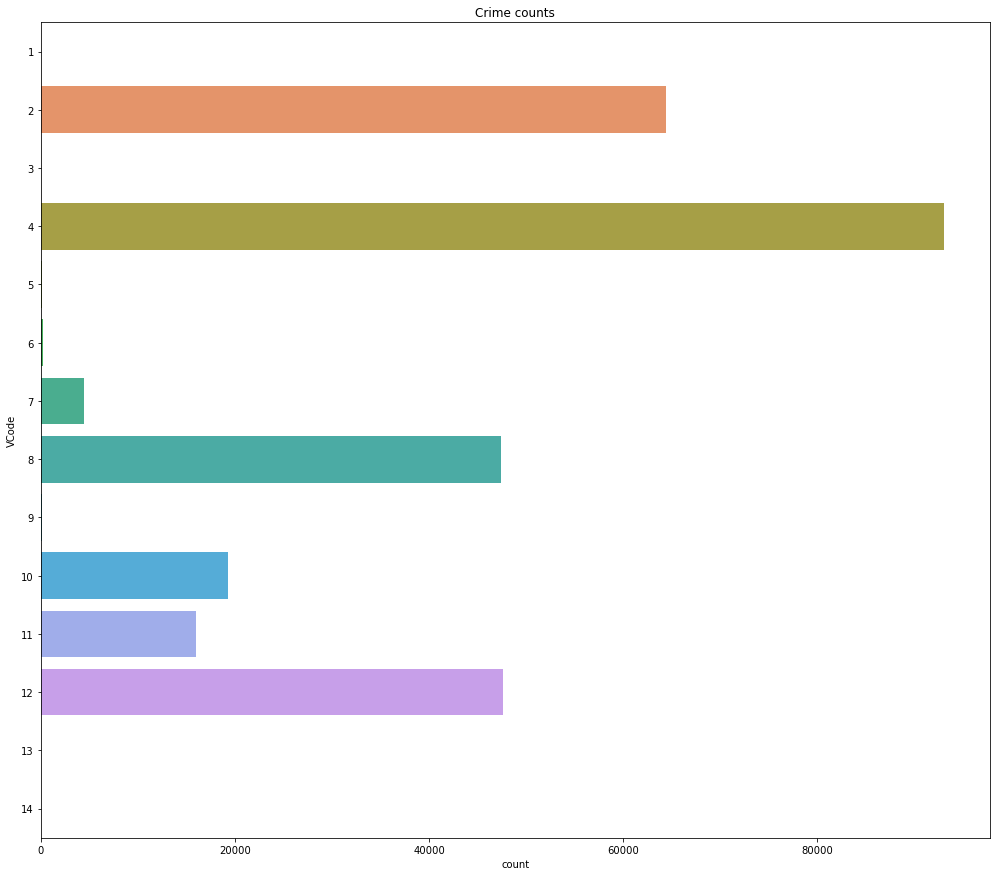

In [181]:
fig, count = plt.subplots(figsize = (17,15))
count = sns.countplot(y = df3['VCode'])
count.set_title('')

In [209]:
dframe = pd.DataFrame({'Actual':Y_test,'Predict':nn_pred})
print('Accuracy score', metrics.accuracy_score(Y_test, nn_pred))
print("Recall      : ", metrics.recall_score(Y_test, nn_pred, average='weighted'))
print("Precision   : ", metrics.precision_score(Y_test, nn_pred, average='weighted'))
print("F1 Score    : ", metrics.f1_score(Y_test, nn_pred, average='weighted'))
dframe

Accuracy score 0.35807024736914034
Recall      :  0.35807024736914034
Precision   :  0.3729498454650421
F1 Score    :  0.2919514261865426


/Users/gudmundurjonasson/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Actual,Predict
113861,2,4
219272,2,4
263069,2,4
255044,4,4
180797,11,4
...,...,...
40292,10,4
39332,8,12
201267,11,2
203304,8,2


In [15]:
df3.to_csv('final_df.csv')